 <h1><center>Python</center></h1>

### Total Marks: 100
#### Each question 10 marks

#### Question 1: -

Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”

Example output - 5

Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def get_length_of_highest_frequency_word(string):
    words = string.split()
    word_frequency = {word: words.count(word) for word in set(words)}
    highest_frequency = max(word_frequency.values())
    highest_frequency_words = [word for word, frequency in word_frequency.items() if frequency == highest_frequency]

    return len(highest_frequency_words[0]) if highest_frequency_words else 0

# Prompt for user input
string = input("Enter a string: ")
result = get_length_of_highest_frequency_word(string)
print("Length of the highest-frequency word:", result)

Enter a string: write write write all the number from from from 1 to 100
Length of the highest-frequency word: 5


#### Question 2: -

Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [20]:
def chk_valid_string(s):
    char_frequency = {char: s.count(char) for char in set(s)}
    frequencies = list(char_frequency.values())
    
    if len(set(frequencies)) == 1:
        return "YES"

    min_freq = min(frequencies)
    if frequencies.count(min_freq) == 1 and len(set(frequencies)) == 2:
        return "YES"

    return "NO"

# Example input 1
string1 = "abc"
result1 = chk_valid_string(string1)
print(result1)

# Example input 2
string2 = "abcc"
result2 = chk_valid_string(string2)
print(result2)


YES
NO


In [21]:
# Prompt for user input
string = input("Enter a string: ")
result = chk_valid_string(string)
print(result)

Enter a string: aabbcc
YES


### Question 3: -
    
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

Note - Write comments wherever necessary explaining the code written

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - id: Identification Number - int num: Number of the

● Pokémon in the official Pokédex - int name: Pokémon name -

● string img: URL to an image of this Pokémon - string type:

● Pokémon type -string height: Pokémon height - float

● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given

● when transferred - string candy_count: the amount of candies required to evolve
- int

● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:

● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int

● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:

Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of

● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [1]:
import requests
import pandas as pd
import json

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to download data.")
        return None

def convert_to_dataframe(data):
    # Extract the relevant attributes from the data
    attributes = ['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy', 'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution']
    pokemon_data = data['pokemon']

    # Create a pandas DataFrame from the extracted data
    df = pd.json_normalize(pokemon_data)
    df = df[attributes]

    return df

def export_to_excel(dataframe, filename):
    try:
        dataframe.to_excel(filename, index=False)
        print(f"Data exported to {filename} successfully.")
    except Exception as e:
        print(f"Failed to export data to {filename}. Error: {str(e)}")

# Provide the link to download the data
data_url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Download the data
data = download_data(data_url)

# Convert the data to a pandas DataFrame
if data:
    df = convert_to_dataframe(data)

    # Specify the filename to save the Excel file
    excel_filename = "pokemonGo_data.xlsx"

    # Export the DataFrame to Excel
    export_to_excel(df, excel_filename)


Data exported to pokemonGo_data.xlsx successfully.


### Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

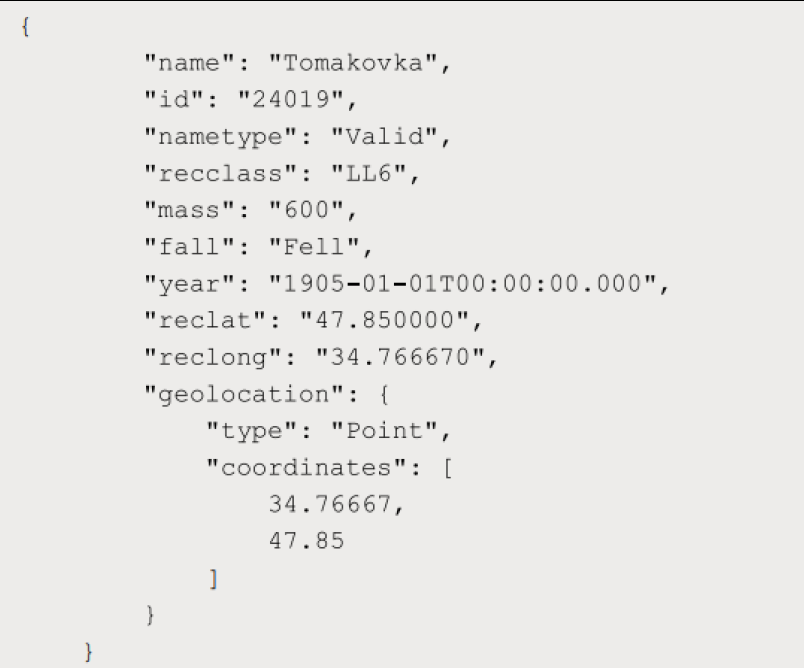

In [22]:
import requests
import pandas as pd

# Function to download data from the given URL
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data. Status code: {response.status_code}")

# URL to download the data from
data_url = 'https://data.nasa.gov/resource/y77d-th95.json'

# Downloading the data
data = download_data(data_url)

# Converting data to a DataFrame
df = pd.json_normalize(data)

# Renaming the column from "geolocation" to "coordinates"
df.rename(columns={"geolocation.coordinates": "coordinates"}, inplace=True)
df = df[['name','id','nametype','recclass','mass','fall','year','reclat','reclong','geolocation.type','coordinates']]

# Saving the DataFrame as a CSV file
csv_file = 'nasa_data.csv'
df.to_csv(csv_file, index=False)

print(f"Data downloaded and saved as {csv_file}.")

Data downloaded and saved as nasa_data.csv.


### Question 5 -

Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

Excepted Output Data Attributes -
● id - int url - string

● name - string season

● - int number - int

● type - string airdate -

● date format airtime -

● 12-hour time format

● runtime - float

● average rating - float

● summary - string

● without html tags

● medium image link - string

● Original image link - string

In [1]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup


# Get the data from the API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

# Convert the response to JSON
data = json.loads(response.content)

# Extract the desired data
episodes = data["_embedded"]["episodes"]
df = pd.DataFrame(episodes)

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove html tags from summary
df['summary'] = df['summary'].apply(remove_html_tags)

# Average rating
df['average rating'] = df['rating'].apply(lambda x: x['average'])

# Convert to 12-hour time format
df['airtime'] = pd.to_datetime(df['airtime'], format='%H:%M')
df['airtime'] = df['airtime'].dt.strftime('%I:%M %p')

# get image link from image column
df['medium image link'] = df['image'].apply(lambda x: x['medium'])
df['Original image link'] = df['image'].apply(lambda x: x['original'])

df[['id','url','name','season','number','type','airdate','airtime','runtime','average rating','summary','medium image link','Original image link']]

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,Original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00 PM,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00 PM,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,09:00 PM,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,09:00 PM,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00 PM,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [3]:
df.to_csv('tv_output.csv')

**Question 7 -**
Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [26]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,coordinates,only_year,before_2000
0,Aachen,1,Valid,L5,21,Fell,NaN,50.775000,6.083330,Point,"[6.08333, 50.775]",nan,False
1,Aarhus,2,Valid,H6,720,Fell,NaN,56.183330,10.233330,Point,"[10.23333, 56.18333]",nan,False
2,Abee,6,Valid,EH4,107000,Fell,NaN,54.216670,-113.000000,Point,"[-113, 54.21667]",nan,False
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,NaN,16.883330,-99.900000,Point,"[-99.9, 16.88333]",nan,False
4,Achiras,370,Valid,L6,780,Fell,NaN,-33.166670,-64.950000,Point,"[-64.95, -33.16667]",nan,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,NaN,13.633330,79.416670,Point,"[79.41667, 13.63333]",nan,False
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,NaN,29.481950,-7.611230,Point,"[-7.61123, 29.48195]",nan,False
997,Tjabe,24011,Valid,H6,20000,Fell,NaN,-7.083330,111.533330,Point,"[111.53333, -7.08333]",nan,False
998,Tjerebon,24012,Valid,L5,16500,Fell,NaN,-6.666670,106.583330,Point,"[106.58333, -6.66667]",nan,False


### Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [5]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup


# Get the data from the API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

# Convert the response to JSON
data = json.loads(response.content)

# Extract the desired data
episodes = data["_embedded"]["episodes"]
df = pd.DataFrame(episodes)

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove html tags from summary
df['summary'] = df['summary'].apply(remove_html_tags)

# Average rating
df['average rating'] = df['rating'].apply(lambda x: x['average'])

# Convert to 12-hour time format
df['airtime'] = pd.to_datetime(df['airtime'], format='%H:%M')
df['airtime'] = df['airtime'].dt.strftime('%I:%M %p')

# get image link from image column
df['medium image link'] = df['image'].apply(lambda x: x['medium'])
df['Original image link'] = df['image'].apply(lambda x: x['original'])

df=df[['id','url','name','season','number','type','airdate','airtime','runtime','average rating','summary','medium image link','Original image link']]

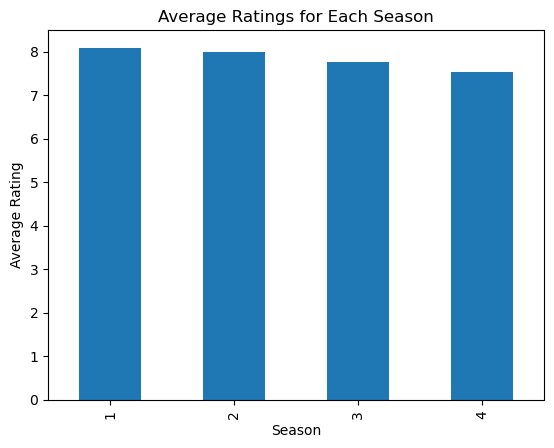

In [9]:
import matplotlib.pyplot as plt

season_ratings = df.groupby('season')['average rating'].mean()
season_ratings.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()


In [8]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,Original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [14]:
# Get all the episode names whose average rating is more than 8 for every season:
high_rated_episodes = df.groupby(['season', 'name'])['average rating'].mean().reset_index()
high_rated_episodes = high_rated_episodes[high_rated_episodes['average rating'] > 8]['name']
high_rated_episodes

4            The Bicameral Mind
7     The Well-Tempered Clavier
9                 Trompe L'Oeil
12                      Kiksuya
16                The Passenger
18              Vanishing Point
Name: name, dtype: object

In [15]:
# Get all the episode names that aired before May 2019
df['airdate'] = pd.to_datetime(df['airdate'])
before_may_2019 = df[df['airdate'] < '2019-05-01']['name']
before_may_2019

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [16]:
#● Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('season')['average rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['average rating'].idxmin()
highest_rated_names = df.loc[highest_rated_episodes, 'name']
lowest_rated_names = df.loc[lowest_rated_episodes, 'name']


In [17]:
highest_rated_names

9     The Bicameral Mind
17               Kiksuya
20          Parce Domine
32              Zhuangzi
Name: name, dtype: object

In [18]:
lowest_rated_names

2        The Stray
14    Akane No Mai
25     Decoherence
28    The Auguries
Name: name, dtype: object

In [19]:
# ● Get the summary for the most popular ( ratings ) episode in every season
most_popular_episodes = df.groupby('season')['average rating'].idxmax()
most_popular_summaries = df.loc[most_popular_episodes, 'summary']
most_popular_summaries

9     Delores finds out the truth about William's fa...
17    Another of Westworld's Host revolutionaries is...
20    If you're stuck in a loop, try walking in a st...
32                                        God is bored.
Name: summary, dtype: object

### Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided link into a pandas DataFrame
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

#### ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [23]:
not_clean_cars=df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']
not_clean_cars[['Make','Model Year','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range']]


,Make,Model Year,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
6,FORD,2016,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19
7,AUDI,2023,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23
8,FORD,2014,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19
14,FORD,2017,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
15,KIA,2020,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26
...,...,...,...,...,...,...
130377,BMW,2019,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16
130385,AUDI,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16
130390,JEEP,2023,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21
130407,TOYOTA,2017,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25


#### ● Get all TESLA cars with the model year, and model type made in Bothell City.

In [32]:
tesla_bothell_cars = df.query("Make == 'TESLA' and City == 'Bothell'")
tesla_bothell_cars[['Model Year','Model']]

,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


● Get all the cars that have an electric range of more than 100, and were made after 2015

In [41]:
electric_range_gt_100 = df.query("`Electric Range` > 100 and `Model Year` > 2015")
electric_range_gt_100

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


● Draw plots to show the distribution between city and electric vehicle type

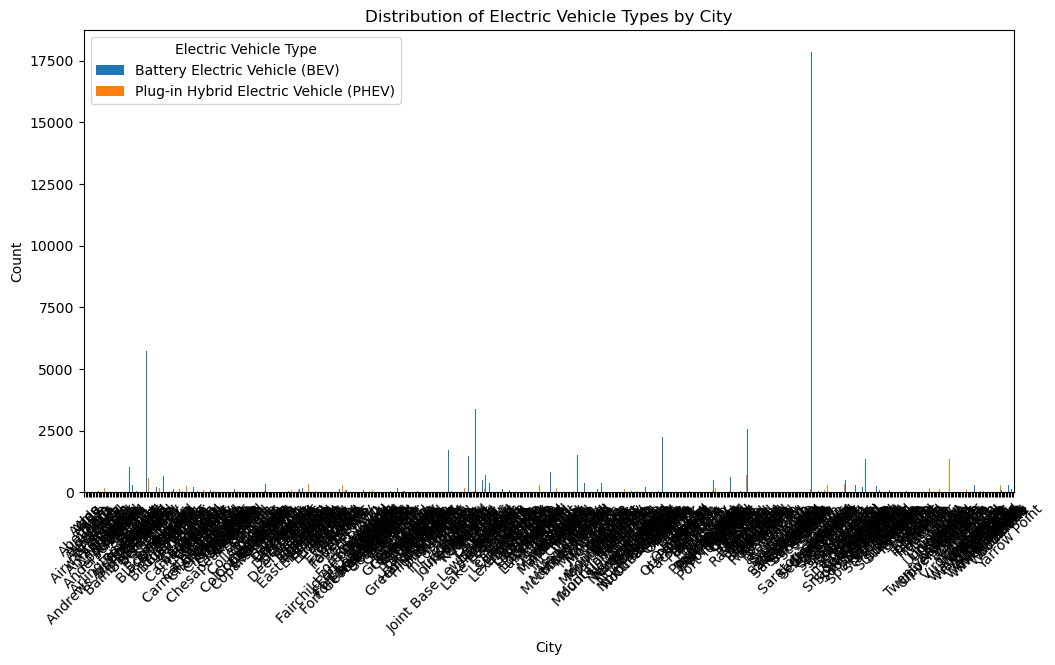

In [51]:
# Calculate the count of electric vehicle types by city
df_grouped = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Plot a grouped bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 6))

# Set the title and labels
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Electric Vehicle Type')

# Display the plot
plt.show()

### Question 10 -

Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.

Note -
1. Write code comments wherever required for code

2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [7]:
import spacy

def count_pos_tags(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    pos_counts = {'nouns': 0,'pronouns': 0, 'verbs': 0,'adjectives': 0}

    for token in doc:
        if token.pos_ == 'NOUN':
            pos_counts['nouns'] += 1
        elif token.pos_ == 'VERB':
            pos_counts['verbs'] += 1
        elif token.pos_ == 'PRON':
            pos_counts['pronouns'] += 1
        elif token.pos_ == 'ADJ':
            pos_counts['adjectives'] += 1

    return pos_counts

# Test Case 1
phrase = "You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same."
counts = count_pos_tags(phrase)
print(counts)  

{'nouns': 4, 'pronouns': 3, 'verbs': 4, 'adjectives': 2}


Explanation:

   We import spacy library.spaCy is an open-source software library for advanced natural language processing.
    
   Then download the English language model using spacy.load('en_core_web_sm')    spacy.cli.download('en_core_web_sm')

   The count_pos_tags function takes a text parameter, which represents the input phrase or paragraph.
   We create a doc object by calling nlp(text), which tokenizes and tags the words in the given text.We initialize a dictionary called pos_counts with initial counts for each part-of-speech tag: 'nouns', 'pronouns', 'verbs', and 'adjectives'. All counts are set to 0 initially.We iterate over each token in the doc and check its pos_ attribute to determine its part-of-speech tag.

   Depending on the tag, we increment the corresponding count in the pos_counts dictionary.

   Finally, we return the pos_counts dictionary.

In [8]:
# Test Case 2
phrase = "Data science is the study of data to extract meaningful insights for business."
counts = count_pos_tags(phrase)
print(counts) 

{'nouns': 6, 'pronouns': 0, 'verbs': 1, 'adjectives': 1}
